Data Exploration of new data provided by district 18 

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
file_names = [
    ('2024-10-08 District 18 Scores.json', '2023 District 18 Scores.json'),
    ('2024-10-08 District 18 Schools.json', 'District 18 Anonymized Schools.json'),
    ('2024-10-08 District 18 Student Attributes.json', '2023 District 18 Student Attributes.json'),
    ('2024-10-08 District 18 Vendor Student Usage.json', '2023 Distrcit 18 Vendor Student Usage'),
    ('2024-10-08 Distrcit 18 Vendor Usage Types.json','District 18 Vendor Usage Types.json'),
    ('2024-10-15 District 18 Benchmarks.json', 'benchmarksByMeasurement18_202410141332.json')
]

for old_name, new_name in file_names:
    old_path = os.path.join(data_path, 'raw', old_name)
    new_path = os.path.join(data_path, 'raw', new_name)
    if os.path.exists(old_path) and not os.path.exists(new_path):
        os.rename(old_path, new_path)

In [5]:
with open('data/raw/2023 District 18 Scores.json', 'r') as file:
    scores_json = json.loads(file.read())

with open('data/raw/District 18 Anonymized Schools.json', 'r') as file:
    schools_json = json.loads(file.read())

with open('data/raw/2023 District 18 Student Attributes.json', 'r') as file:
    studentAttributes_json = json.loads(file.read())

with open('data/raw/2023 District 18 Vendor Student Usage.json', 'r') as file:
    vendorUsage_json = json.loads(file.read())

with open('data/raw/District 18 Vendor Usage Types.json', 'r') as file:
    vendorUsageTypes_json = json.loads(file.read())

with open('data/raw/benchmarksByMeasurement18_202410141332.json', 'r') as file:
    benchmarks_json = json.loads(file.read())

In [6]:
scores_data = scores_json[list(scores_json.keys())[0]]
scores_df= pd.DataFrame(scores_data)

schools_data = schools_json[list(schools_json.keys())[0]]
schools_df = pd.DataFrame(schools_data)

studentAttributes_data = studentAttributes_json[list(studentAttributes_json.keys())[0]]
studentAttributes_df=pd.DataFrame(studentAttributes_data)

vendorUsage_data = vendorUsage_json[list(vendorUsage_json.keys())[0]]
vendorUsage_df = pd.DataFrame(vendorUsage_data)

vendorUsageTypes_data = vendorUsageTypes_json[list(vendorUsageTypes_json.keys())[0]]
vendorUsageTypes_df = pd.DataFrame(vendorUsageTypes_data)

benchmarks_data = benchmarks_json[list(benchmarks_json.keys())[0]]
benchmarks_df = pd.DataFrame(benchmarks_data)


In [7]:
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

processed_dir = os.path.join(data_path, 'processed')
if os.path.exists(processed_dir):
    for file in os.listdir(processed_dir):
        file_path = os.path.join(processed_dir, file)
        if os.path.isfile(file_path):
            os.unlink(file_path)

os.makedirs(os.path.dirname(data_path), exist_ok=True)
scores_df.to_csv(os.path.join(data_path, 'processed', '18_scores_2024-10-08.csv'), index=False)
schools_df.to_csv(os.path.join(data_path, 'processed', '18_schools_2024-10-08.csv'), index=False)
studentAttributes_df.to_csv(os.path.join(data_path, 'processed', '18_studentAttributes_2024-10-08.csv'), index=False)
vendorUsage_df.to_csv(os.path.join(data_path, 'processed', '18_vendorUsage_2024-10-08.csv'), index=False)
vendorUsageTypes_df.to_csv(os.path.join(data_path, 'processed', '18_vendorUsageTypes_2024-10-08.csv'), index=False)
benchmarks_df.to_csv(os.path.join(data_path, 'processed', '18_benchmark_2024-10-15.csv'), index=False)



Benchmarks

In [8]:
print(benchmarks_df.shape)
print(benchmarks_df.columns)
print(benchmarks_df.dtypes)

(362, 7)
Index(['id', 'districtId', 'year', 'level', 'dataSource', 'value',
       'measurementTypeId'],
      dtype='object')
id                     int64
districtId             int64
year                   int64
level                  int64
dataSource            object
value                float64
measurementTypeId      int64
dtype: object


In [9]:
benchmarks_df.head()

,id,districtId,year,level,dataSource,value,measurementTypeId
0,47385,18,2023,0,value_starReadingUnified,783.0,0
1,47386,18,2023,0,value_starEarlyLitUnified,783.0,0
2,1114106,18,2023,0,value_starReadingUnified,846.0,0
3,1117112,18,2023,0,value_acapLexile,190.0,0
4,1117203,18,2023,0,value_lexileStar,190.0,0


<Axes: ylabel='dataSource'>

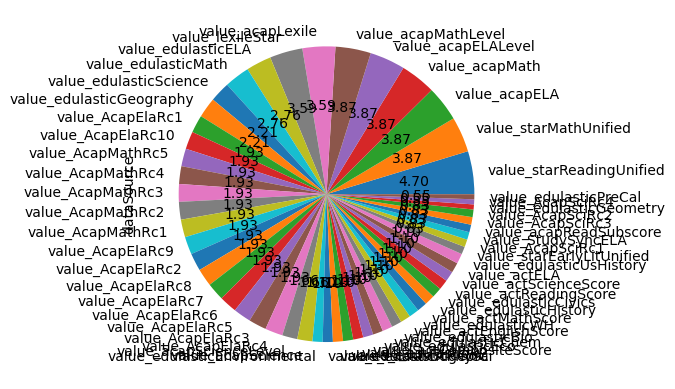

In [10]:
benchmarks_df['dataSource'].value_counts().plot.pie(autopct='%.2f')

In [11]:
for col in benchmarks_df.columns:
    unique_values = benchmarks_df[col].unique()
    nunique_values = benchmarks_df[col].nunique()

    print(f"Unique values in column '{col}' : {unique_values}\n")

    print(f"Number of unique values in '{col}': {nunique_values}\n")

Unique values in column 'id' : [  47385   47386 1114106 1117112 1117203   47361   47373   47387 1117113
 1117204   47362   47374   47388   53798   53805   53815   53822 1114102
 1116524 1116531 1116541 1116548 1117114 1117205 1125434 1125435 1125436
 1125437 1125438 1125439 1125440 1125441 1125442 1125443 1125444 1125445
 1125446 1125447 1125448   47363   47375   48169   48172   53799   53806
   53816   53823 1114103 1116525 1116532 1116542 1116549 1117115 1117206
 1125449 1125450 1125451 1125452 1125453 1125454 1125455 1125456 1125457
 1125458 1125459 1125460 1125461 1125462 1125463   47364   47376   48170
   48173   53800   53807   53812   53817   53824   53829 1114104 1116526
 1116533 1116538 1116543 1116550 1116555 1117116 1117207 1125464 1125465
 1125466 1125467 1125468 1125469 1125470 1125471 1125472 1125473 1125474
 1125475 1125476 1125477 1125478 1125539 1125540 1125541 1125542   47365
   47377   48171   48174   48245   48257   48267   48277   49602   53801
   53808   53818   5

In [12]:
benchmarks_df = benchmarks_df.drop('measurementTypeId',axis=1)
print(benchmarks_df.columns)

#get rid of level 0 
benchmarks_df = benchmarks_df[benchmarks_df['level'] != 0]

Index(['id', 'districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


In [13]:
benchmarks_df.head(25)
#issues with value_acpElaRc# shows up multiple times.

,id,districtId,year,level,dataSource,value
5,47361,18,2023,1,value_starMathUnified,841.0
6,47373,18,2023,1,value_starReadingUnified,846.0
7,47387,18,2023,1,value_starEarlyLitUnified,846.0
8,1117113,18,2023,1,value_acapLexile,190.0
9,1117204,18,2023,1,value_lexileStar,190.0
10,47362,18,2023,2,value_starMathUnified,936.0
11,47374,18,2023,2,value_starReadingUnified,938.0
12,47388,18,2023,2,value_starEarlyLitUnified,938.0
13,53798,18,2023,2,value_acapELA,501.0
14,53805,18,2023,2,value_acapMath,523.0


In [14]:
dataSource_value = benchmarks_df['dataSource'].unique().tolist()
print(dataSource_value)

['value_starMathUnified', 'value_starReadingUnified', 'value_starEarlyLitUnified', 'value_acapLexile', 'value_lexileStar', 'value_acapELA', 'value_acapMath', 'value_acapELALevel', 'value_acapMathLevel', 'value_acapReadSubscore', 'value_AcapElaRc1', 'value_AcapElaRc2', 'value_AcapElaRc3', 'value_AcapElaRc4', 'value_AcapElaRc5', 'value_AcapElaRc6', 'value_AcapElaRc7', 'value_AcapElaRc8', 'value_AcapElaRc9', 'value_AcapElaRc10', 'value_AcapMathRc1', 'value_AcapMathRc2', 'value_AcapMathRc3', 'value_AcapMathRc4', 'value_AcapMathRc5', 'value_edulasticELA', 'value_edulasticMath', 'value_acapScience', 'value_acapScienceLevel', 'value_AcapSciRc1', 'value_AcapSciRc2', 'value_AcapSciRc3', 'value_AcapSciRc4', 'value_edulasticCivics', 'value_edulasticGeography', 'value_edulasticHistory', 'value_edulasticScience', 'value_StudySyncELA', 'value_edulasticAlgebra', 'value_edulasticBio', 'value_edulasticChem', 'value_edulasticEco', 'value_edulasticEnvironmental', 'value_edulasticGeometry', 'value_edulast

In [15]:
#filtering what grades each grade took 

filteredG1 = benchmarks_df[benchmarks_df['level'] == 1]
print(filteredG1)

print("\n")
filteredG2 = benchmarks_df[benchmarks_df['level'] == 2]
print(filteredG2)



        id  districtId  year  level                 dataSource  value
5    47361          18  2023      1      value_starMathUnified  841.0
6    47373          18  2023      1   value_starReadingUnified  846.0
7    47387          18  2023      1  value_starEarlyLitUnified  846.0
8  1117113          18  2023      1           value_acapLexile  190.0
9  1117204          18  2023      1           value_lexileStar  190.0


         id  districtId  year  level                 dataSource  value
10    47362          18  2023      2      value_starMathUnified  936.0
11    47374          18  2023      2   value_starReadingUnified  938.0
12    47388          18  2023      2  value_starEarlyLitUnified  938.0
13    53798          18  2023      2              value_acapELA  501.0
14    53805          18  2023      2             value_acapMath  523.0
15    53815          18  2023      2         value_acapELALevel    3.0
16    53822          18  2023      2        value_acapMathLevel    3.0
17  111410

In [16]:
filteredG3 = benchmarks_df[benchmarks_df['level'] == 3]
print(filteredG3)


         id  districtId  year  level                dataSource  value
39    47363          18  2023      3     value_starMathUnified  996.0
40    47375          18  2023      3  value_starReadingUnified  969.0
41    48169          18  2023      3        value_edulasticELA   70.0
42    48172          18  2023      3       value_edulasticMath   70.0
43    53799          18  2023      3             value_acapELA  496.0
44    53806          18  2023      3            value_acapMath  530.0
45    53816          18  2023      3        value_acapELALevel    3.0
46    53823          18  2023      3       value_acapMathLevel    3.0
47  1114103          18  2023      3    value_acapReadSubscore  496.0
48  1116525          18  2023      3             value_acapELA  496.0
49  1116532          18  2023      3            value_acapMath  530.0
50  1116542          18  2023      3        value_acapELALevel    3.0
51  1116549          18  2023      3       value_acapMathLevel    3.0
52  1117115         

scores

In [17]:
print(scores_df.columns)
print(scores_df.shape)
print(scores_df.dtypes)

Index(['id', 'districtId', 'subgroup_TCAPELALevel', 'ticket', 'studentId',
       'studentLevel', 'year', 'scoreDate', 'measurementTypeId',
       'subgroup_specialEd',
       ...
       'value_ElpacOralLevel', 'value_ElpacWritten', 'value_ElpacWrittenLevel',
       'value_AcapSciRc1', 'value_AcapSciRc2', 'value_AcapSciRc3',
       'value_AcapSciRc4', 'value_fsaWriting', 'value_fsaWritingLevel',
       'value_acadienceReadingCompositeLevel'],
      dtype='object', length=715)
(132258, 715)
id                                        int64
districtId                                int64
subgroup_TCAPELALevel                     int64
ticket                                   object
studentId                                 int64
studentLevel                              int64
year                                      int64
scoreDate                                object
measurementTypeId                         int64
subgroup_specialEd                        int64
subgroup_lunchStatus     

In [18]:
scores_df.head(15)


,id,districtId,subgroup_TCAPELALevel,ticket,studentId,studentLevel,year,scoreDate,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subGroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_nweaELA,value_scantronMath,value_scantronReading,value_MAAPMath,value_MAAPRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_actELAScore,value_MAAPScience,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_lexile,value_AlgebraGMA,value_GeometryGMA,value_BiologyGMA,value_EconomicsGMA,value_PhysScienceGMA,value_AmLitGMA,value_9thLitGMA,value_UsHisGMA,value_AnalyticGeoGMA,value_DibelsOrf,value_DibelsLNF,value_DibelsNWF,value_MaapEnglishII,value_MaapAlgI,value_MaapBio,value_MaapUsHis,value_AlgIBenchmark,value_AlgIABenchmark,value_AlgIBBenchmark,value_AlgConnBenchmark,value_AlgIIBenchmark,value_AlgIITrigBenchmark,value_BioBenchmark,value_ChemBenchmark,value_EconomicsBenchmark,value_EnglishBenchmark,value_EnvironmentalBenchmark,value_GeometryBenchmark,value_PhyScienceBenchmark,value_UsGovBenchmark,value_UsHisBenchmark,value_WorldHis9Benchmark,value_MAAPRLAProf,value_MAAPMathProf,value_tcapELA,value_tcapMath,value_tcapScience,value_tcapSocialStudies,value_tcapEnglishI,value_tcapEnglishII,value_tcapAlgebraI,value_tcapAlgebraII,value_tcapGeometry,value_tcapIntMathI,value_tcapIntMathIII,value_tcapIntMathII,value_tcapBiology,value_tcapUSHistory,value_tcapGeography,value_AccessScaleScore,value_AccessProficiency,value_acapELA,value_acapMath,value_nweaScience,value_StarEarlyLit,value_caseAlg,value_caseBio,value_caseEng,value_caseHis,value_caseRead,value_caseMath,value_caseSci,value_gcaInfo,value_gcaNar,value_gcaOpin,value_pivotMath,value_pivotELA,value_elsMath,value_elsEng,value_elsELA,value_elsAlg,value_SATEBRW,value_SATMath,value_transMath,value_SATComposite,value_edmentumMath,value_edmentumReading,value_edmentumELA,value_mStepMath,value_mStepELA,value_mStepSocial,value_lexia,value_PSATComposite,value_PSATMath,value_PSATEBRW,value_gcaEng,value_gcaAlg,value_gcaBio,value_gcaEcon,value_gcaPhysSci,value_gcaMath,value_gcaELA,value_gcaScience,value_gcaSocial,value_gcaUsHis,value_iarELA,value_iarMath,value_gcaGeo,value_edulasticELA,value_drcELA,value_drcMath,value_iStationReading,value_iStationMath,value_iStationReadingLevel,value_iStationMathLevel,value_BeaconELA,value_BeaconMath,value_DibelsComposite,value_StarMathGLE,value_StarReadingGLE,value_StarEarlyLitGLE,value_LexiaCore,value_LexiaPower,value_imagineLiteracy,value_CaseMathPercentCorrect,value_CaseReadPercentCorrect,value_PSF,value_LNF,value_LWSF,value_WRF,value_NWF,value_ORF,value_Voc,value_NNF,value_Ca,value_QTF,value_QDF,value_NCFT,value_NCFP,value_MFF1D,value_MFFT,value_CaseAlgPercentCorrect,value_CaseBioPercentCorrect,value_CaseEngIIPercentCorrect,value_CaseUsHisPercentCorrect,value_NSF,value_MCF,value_ENB,value_MathB,value_elsBio,value_MasteryPrepComposite,value_MasteryPrepEnglish,value_MasteryPrepMath,value_MasteryPrepReading,value_MasteryPrepScience,value_actSuperscore,value_actStemScore,value_MathInventory,value_ReadingInventory,value_DibelsPSF,value_DibelsWRF,value_DibelsMAZE,subgroup_TCAPMathLevel,value_TCAPELALevel,value_TCAPMathLevel,value_SummerELA,value_SummerMath,value_AandPBenchmark,value_UsHisIIBenchmark,value_acapMathLevel,value_acapELALevel,value_EarthSpaceBenchmark,value_PreCalBenchmark,value_ELAMilestonesLevel,value_MathMilestonesLevel,value_acapScience,value_SciMilestonesLevel,value_SocMilestonesLevel,value_IXLELA,value_IXLMath,value_DibelsNWFWRC,value_DibelsOrfWC,value_CertReading,value_C

In [19]:
duplicatedId = scores_df['studentId'].duplicated()
sumDuplicates = duplicatedId.sum()
print(sumDuplicates)


120625


In [20]:
for col in scores_df.columns:
    unique_values = scores_df[col].unique()
    nunique_values = scores_df[col].nunique()
    nan_count = scores_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'id' : [3268686 4933778 5441518 ... 7719120 7719121 7719122]

Nunique values in 'id' : 132258

Number of NaN in 'id' : 0

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'subgroup_TCAPELALevel' : [0]

Nunique values in 'subgroup_TCAPELALevel' : 1

Number of NaN in 'subgroup_TCAPELALevel' : 0

Unique values in 'ticket' : ['1670274005jaxk7kpda0' '' '1720038133u1v82g9ag2' '17273692353nnix0z0ux']

Nunique values in 'ticket' : 4

Number of NaN in 'ticket' : 0

Unique values in 'studentId' : [1480117 1480118 1480120 ... 2513587 2513589 2513590]

Nunique values in 'studentId' : 11633

Number of NaN in 'studentId' : 0

Unique values in 'studentLevel' : [11 12 56 10  8  6  7  9  5  3  4  2  1  0 52 62 -1]

Nunique values in 'studentLevel' : 17

Number of NaN in 'studentLevel' : 0

Unique values in 'year' : [2023]

Nunique values in 'year' : 1

Number of NaN in 'year' : 0

Unique values in 'scoreDate' 

In [21]:
scores_df = scores_df.drop(columns = [col for col in scores_df if scores_df[col].nunique() == 1])

In [22]:
print(scores_df.shape)
print(scores_df.columns)


(132258, 68)
Index(['id', 'ticket', 'studentId', 'studentLevel', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_gender', 'subgroup_ell',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_starReading',
       'value_starMath', 'value_acapELA', 'value_acapMath',
       'value_StarEarlyLit', 'value_edulasticELA', 'value_actStemScore',
       'value_acapMathLevel', 'value_acapELALevel', 'value_acapScience',
       'value_acapScienceLevel', 'value_edulasticMath',
       'value_edulasticScience', 'value_edulasticHistory',
       'value_acapReadSubscore', 'value_lexileStar', 'value_acapLexile',
       'value_StudySyncELA', 'value_edulasticAlgebra',
       'value_edulasticGeometry', 'value_edulasticPreCal',
       'value_edulasticPhySci', 'value_edulasticBio', 'value_edulasticChem',
       'value_edulasticEnvironmental', 'value_edulasticWH',
       'value_edulasticUsHistory', 'value_edul

In [23]:
num_cols_na = scores_df.isnull().any().sum()
print(num_cols_na)

0


In [24]:
#check all the exams in benchmarks against scores 
searchValue = 'value_'

colsWvalue = [col for col in scores_df if searchValue in col]
#print(colsWvalue)


#check to see what exames in benchmarks are in scores 
common = []

#exists = any(exam in colsWvalue for exam in dataSource_value)
#print(exists)

for exam in dataSource_value:
    if exam in colsWvalue:
        common.append(exam)
print("common exams", exam, "\n")

common exams value_edulasticPreCal 



In [25]:
#all grades present 1-12 in student level scores
#make individual dataframe for each grade so it is easier to see, value = 0 drop that column did not take it 

firstGrade_df = scores_df[scores_df['studentLevel'] ==1]
firstGrade_df.head()

,id,ticket,studentId,studentLevel,measurementTypeId,subgroup_specialEd,subgroup_gender,subgroup_ell,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_starReading,value_starMath,value_acapELA,value_acapMath,value_StarEarlyLit,value_edulasticELA,value_actStemScore,value_acapMathLevel,value_acapELALevel,value_acapScience,value_acapScienceLevel,value_edulasticMath,value_edulasticScience,value_edulasticHistory,value_acapReadSubscore,value_lexileStar,value_acapLexile,value_StudySyncELA,value_edulasticAlgebra,value_edulasticGeometry,value_edulasticPreCal,value_edulasticPhySci,value_edulasticBio,value_edulasticChem,value_edulasticEnvironmental,value_edulasticWH,value_edulasticUsHistory,value_edulasticEco,value_edulasticGov,value_edulasticCivics,value_edulasticGeography,value_starReadingUnified,value_starMathUnified,value_starEarlyLitUnified,value_edulasticAP,value_caseMathLevelExt,value_AcapElaRc1,value_AcapElaRc2,value_AcapElaRc3,value_AcapElaRc4,value_AcapElaRc5,value_AcapElaRc6,value_AcapElaRc7,value_AcapElaRc8,value_AcapElaRc9,value_AcapElaRc10,value_AcapMathRc1,value_AcapMathRc2,value_AcapMathRc3,value_AcapMathRc4,value_AcapMathRc5,value_AcapSciRc1,value_AcapSciRc2,value_AcapSciRc3,value_AcapSciRc4
45331,4703269,,1485452,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,762,740,743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45332,4720071,,1485452,1,4,0,0,0,0,0,0,0,0,0,0,0,0,579,0,0,0,0,0,0,0,0,0,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45333,5424171,,1485452,1,5,0,0,0,0,0,0,0,0,74,433,0,0,509,0,0,0,0,0,0,0,0,0,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,764,873,695,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45334,6999893,,1485452,1,40,0,0,0,0,0,0,0,0,0,0,0,0,665,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,780,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45335,7001461,,1485452,1,6,0,0,0,0,0,0,0,0,75,394,0,0,665,0,0,0,0,0,0,0,0,0,0,385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,767,849,780,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
valueG1_cols = firstGrade_df.filter(like='value').columns
print(valueG1_cols.shape)
for col in valueG1_cols:
    print(col)

(60,)
value_actMathScore
value_actEnglishScore
value_actReadingScore
value_actScienceScore
value_actCompositeScore
value_starReading
value_starMath
value_acapELA
value_acapMath
value_StarEarlyLit
value_edulasticELA
value_actStemScore
value_acapMathLevel
value_acapELALevel
value_acapScience
value_acapScienceLevel
value_edulasticMath
value_edulasticScience
value_edulasticHistory
value_acapReadSubscore
value_lexileStar
value_acapLexile
value_StudySyncELA
value_edulasticAlgebra
value_edulasticGeometry
value_edulasticPreCal
value_edulasticPhySci
value_edulasticBio
value_edulasticChem
value_edulasticEnvironmental
value_edulasticWH
value_edulasticUsHistory
value_edulasticEco
value_edulasticGov
value_edulasticCivics
value_edulasticGeography
value_starReadingUnified
value_starMathUnified
value_starEarlyLitUnified
value_edulasticAP
value_caseMathLevelExt
value_AcapElaRc1
value_AcapElaRc2
value_AcapElaRc3
value_AcapElaRc4
value_AcapElaRc5
value_AcapElaRc6
value_AcapElaRc7
value_AcapElaRc8
value_A

In [27]:
scores_df.head()

,id,ticket,studentId,studentLevel,measurementTypeId,subgroup_specialEd,subgroup_gender,subgroup_ell,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_starReading,value_starMath,value_acapELA,value_acapMath,value_StarEarlyLit,value_edulasticELA,value_actStemScore,value_acapMathLevel,value_acapELALevel,value_acapScience,value_acapScienceLevel,value_edulasticMath,value_edulasticScience,value_edulasticHistory,value_acapReadSubscore,value_lexileStar,value_acapLexile,value_StudySyncELA,value_edulasticAlgebra,value_edulasticGeometry,value_edulasticPreCal,value_edulasticPhySci,value_edulasticBio,value_edulasticChem,value_edulasticEnvironmental,value_edulasticWH,value_edulasticUsHistory,value_edulasticEco,value_edulasticGov,value_edulasticCivics,value_edulasticGeography,value_starReadingUnified,value_starMathUnified,value_starEarlyLitUnified,value_edulasticAP,value_caseMathLevelExt,value_AcapElaRc1,value_AcapElaRc2,value_AcapElaRc3,value_AcapElaRc4,value_AcapElaRc5,value_AcapElaRc6,value_AcapElaRc7,value_AcapElaRc8,value_AcapElaRc9,value_AcapElaRc10,value_AcapMathRc1,value_AcapMathRc2,value_AcapMathRc3,value_AcapMathRc4,value_AcapMathRc5,value_AcapSciRc1,value_AcapSciRc2,value_AcapSciRc3,value_AcapSciRc4
0,3268686,1670274005jaxk7kpda0,1480117,11,4,0,0,0,17,20,19,24,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4933778,,1480117,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5441518,,1480117,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0,0,0,88,0,88,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7263146,,1480117,11,6,0,0,0,18,21,20,23,21,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7510656,,1480117,11,7,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,84,0,97,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
duplicatedId = scores_df['studentId'].duplicated()
countDuplicates = duplicatedId.count()
print(countDuplicates)

#I know studentID should only be there once 
value_counts = scores_df['studentId'].value_counts()
duplicatedMoreThan1 = (value_counts > 1).all()
print("value_counts",value_counts)
print("Unique values duplicated mroe than once", duplicatedMoreThan1)

132258
value_counts 1483818    19
1802905    19
1490116    19
1487272    19
1803268    19
1802914    19
1487348    19
1802925    19
1489005    19
1484281    19
1484280    19
1802485    19
1803392    19
1483934    19
1483935    19
1489220    19
1484000    19
1804177    19
1487003    19
1803403    19
1489870    19
1489443    19
1802901    19
1802944    19
1803380    19
1488557    19
1802683    19
1803686    19
1488125    19
1803365    19
1487798    19
1802877    19
1803371    19
1802886    19
1485836    19
1485837    19
1802887    19
1485839    19
1802888    19
1803373    19
1802890    19
1802893    19
1802896    19
1802898    19
1490151    19
1490978    19
1802637    19
1803129    19
1802984    19
1802744    19
1803468    19
1804063    19
1802992    19
1802600    19
1803991    19
1489320    19
1802556    19
1488235    19
1803474    19
1491226    19
1803007    19
1802567    19
1803515    19
1484371    19
1803031    19
1487420    19
1803028    19
1803986    19
1485404    19
1802969    19


Schools

In [29]:
print(schools_df.columns)
print(schools_df.shape)

Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')
(24, 8)


In [30]:
schools_df.head()

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,ELEMENTARY SCHOOL A,18,5,EES,1,,0
1,223,MIDDLE SCHOOL A,18,8,EMS,1,,0
2,224,HIGH SCHOOL A,18,10,ECHS,1,,0
3,225,JUNIOR HIGH B,18,12,ECJH,1,,0
4,226,ELEMENTARY SCHOOL B,18,18,HES,1,,0


In [31]:
for col in schools_df.columns:
    unique_values = schools_df[col].unique()
    nunique_values = schools_df[col].nunique()
    nan_count = schools_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'id' : [   222    223    224    225    226    227    228    229    230    231
    232    233    234    235    236    237    238    247    248    249
   1346  46049 282626 282627]

Nunique values in 'id' : 24

Number of NaN in 'id' : 0

Unique values in 'name' : ['ELEMENTARY SCHOOL A' 'MIDDLE SCHOOL A' 'HIGH SCHOOL A' 'JUNIOR HIGH B'
 'ELEMENTARY SCHOOL B' 'MIDDLE SCHOOL B' 'HIGH SCHOOL B' 'MIDDLE SCHOOL C'
 'ELEMENTARY SCHOOL C' 'ELEMENTARY SCHOOL D' 'INTERMEDIATE SCHOOL D'
 'HIGH SCHOOL C' 'ELEMENTARY SCHOOL E' 'ELEMENTARY SCHOOL F'
 'HIGH SCHOOL D' 'MIDDLE SCHOOL E' 'JUNIOR HIGH SCHOOL F'
 'Instructional Services' 'Instructional Support Services'
 'General and Administrative' 'THE EDGE' 'MIDDLE SCHOOL G'
 'TECHNICAL CENTER' 'Technical College']

Nunique values in 'name' : 24

Number of NaN in 'name' : 0

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'costCenter' : [   5    8   10   12   1

student Attributes

In [32]:
print(studentAttributes_df.shape)
print(studentAttributes_df.columns)

(337, 4)
Index(['districtId', 'studentId', 'year', 'value'], dtype='object')


In [33]:
studentAttributes_df.sample(25)

,districtId,studentId,year,value
110,18,1484351,2023,12
317,18,1802721,2023,12
1,18,1480554,2023,11
109,18,1484344,2023,11
315,18,1802540,2023,12
301,18,1490805,2023,11
303,18,1490844,2023,12
185,18,1485029,2023,11
53,18,1483716,2023,12
269,18,1488881,2023,12


<Axes: ylabel='value'>

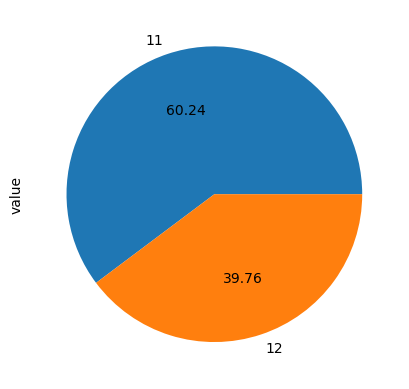

In [34]:
studentAttributes_df['value'].value_counts().plot.pie(autopct='%.2f')
#does value mean like grade level?

In [35]:
for col in studentAttributes_df.columns:
    unique_values = studentAttributes_df[col].unique()
    nunique_values = studentAttributes_df[col].nunique()
    nan_count = studentAttributes_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'studentId' : [1480395 1480554 1481892 1482258 1482301 1482378 1482486 1482843 1482879
 1482947 1482966 1482973 1482994 1482997 1483022 1483034 1483037 1483125
 1483142 1483160 1483262 1483370 1483389 1483438 1483448 1483456 1483476
 1483484 1483488 1483491 1483495 1483504 1483533 1483559 1483569 1483576
 1483579 1483606 1483612 1483623 1483630 1483641 1483647 1483658 1483683
 1483686 1483716 1483717 1483723 1483759 1483774 1483778 1483781 1483783
 1483789 1483805 1483810 1483814 1483829 1483843 1483865 1483874 1483878
 1483897 1483899 1483910 1483932 1483937 1483942 1483957 1483977 1483995
 1484018 1484042 1484079 1484119 1484124 1484127 1484130 1484143 1484149
 1484151 1484163 1484204 1484209 1484210 1484227 1484257 1484269 1484270
 1484340 1484344 1484351 1484353 1484370 1484372 1484419 1484429 1484438
 1484441 1484442 1484448 1484449 1484451 1484465 1484486 

Vendor Usage

In [36]:
print(vendorUsage_df.shape)
print(vendorUsage_df.columns)

(70315, 7)
Index(['districtId', 'studentId', 'year', 'vendorId', 'active', 'usageTypeId',
       'weeklyUsageMinutes'],
      dtype='object')


In [37]:
vendorUsage_df.head()

,districtId,studentId,year,vendorId,active,usageTypeId,weeklyUsageMinutes
0,18,1480117,2023,140472,0,39,4
1,18,1480117,2023,11333,0,6,0
2,18,1480117,2023,72609,0,3,0
3,18,1480118,2023,140472,0,39,4
4,18,1480118,2023,11333,0,6,0


In [38]:
for col in vendorUsage_df.columns:
    unique_values = vendorUsage_df[col].unique()
    nunique_values = vendorUsage_df[col].nunique()
    nan_count = vendorUsage_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'studentId' : [1480117 1480118 1480120 ... 1804198 1804199 1804201]

Nunique values in 'studentId' : 11654

Number of NaN in 'studentId' : 0

Unique values in 'year' : [2023]

Nunique values in 'year' : 1

Number of NaN in 'year' : 0

Unique values in 'vendorId' : [140472  11333  72609 140574 132810 138965 132795]

Nunique values in 'vendorId' : 7

Number of NaN in 'vendorId' : 0

Unique values in 'active' : [0]

Nunique values in 'active' : 1

Number of NaN in 'active' : 0

Unique values in 'usageTypeId' : [39  6  3 42  2  4 40 24 27  5  1  9 41 23 22 25 26 38 37]

Nunique values in 'usageTypeId' : 19

Number of NaN in 'usageTypeId' : 0

Unique values in 'weeklyUsageMinutes' : [   4    0  104 ... 4021 2232 3487]

Nunique values in 'weeklyUsageMinutes' : 3379

Number of NaN in 'weeklyUsageMinutes' : 0



Vendor Usage types

In [39]:
print(vendorUsageTypes_df.columns)
print(vendorUsageTypes_df.shape)

Index(['id', 'name', 'districtId', 'usageTypeId', 'roiBucketType',
       'initiativeId', 'vendorId', 'utilBucketType', 'weeklyUsageMinutes',
       'productId'],
      dtype='object')
(290, 10)


In [40]:
vendorUsageTypes_df.head()

,id,name,districtId,usageTypeId,roiBucketType,initiativeId,vendorId,utilBucketType,weeklyUsageMinutes,productId
0,4,IXL Reading Non,18,1,loss,61,72609,nonUser,0,0
1,5,IXL Reading Partial,18,2,loss,61,72609,partialUser,0,0
2,6,IXL Reading User,18,3,gain,61,72609,fullUser,0,0
3,7,IXL Math Non User,18,4,loss,60,11333,nonUser,0,0
4,8,IXL Math Partial,18,5,loss,60,11333,partialUser,0,0


In [41]:
for col in vendorUsageTypes_df.columns:
    unique_values = vendorUsageTypes_df[col].unique()
    nunique_values = vendorUsageTypes_df[col].nunique()
    nan_count = vendorUsageTypes_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'id' : [    4     5     6     7     8     9   175   176   177   178   179   180
   724   725   726   727   728   729   730   731   732   853   854   855
   856   857   858  1130  1131  1132  1133  1134  1135  1472  1473  1474
  1475  1476  1477  1584  1585  1586  1587  1588  1589  1593  1594  1595
  1596  1597  1598  1599  1600  1601  1602  1603  1604  1911  1912  1913
  1914  1915  1916  2341  2342  2343  2344  2345  2346  2347  2348  2349
  2350  2351  2352  2409  2410  2411  2412  2413  2414  2415  2416  2417
  2418  2419  2420  2421  2422  2423  2424  2425  2426  2427  2428  2429
  2430  2431  2432  3124  3125  3126  3400  3401  3403  3409  3412  3413
  3414  3469  3470  3471  3472  3473  3474  3475  3476  3477  3560  3561
  3562  3563  3564  3565  3566  3567  3568  4302  4303  4304  4305  4306
  4307  4308  4309  4310  4311  4312  4313  4314  4315  4316  4317  4318
  4319  4366  4367  4368  4369  4370  4371  4372  4373  4374  4375  4376
  4377  5754  5755  5756  5

<Axes: ylabel='name'>

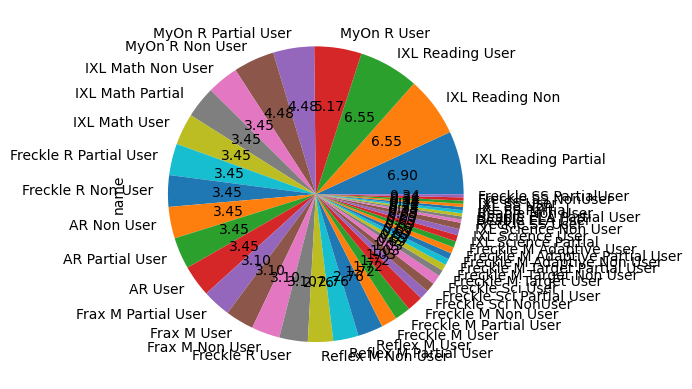

In [42]:
vendorUsageTypes_df['name'].value_counts().plot.pie(autopct='%.2f')